<a href="https://colab.research.google.com/github/divi0301/Fake-News-Detection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import string
import nltk

In [68]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet') # Download WordNet resource if not already downloaded
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [ ]:
!pip install vaderSentiment

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
data = pd.read_csv('/content/fake.csv',low_memory=False)

In [ ]:
data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data.tail()

,title,text,subject,date
19010,BREAKING! Refugee Terrorist Coverup: Obama’s D...,Federal lawmakers are investigating how a form...,left-news,"Mar 9, 2017"
19011,IRONY ALERT! DC’S DAY WITHOUT WOMEN Literally ...,We hope these women realize they were being us...,left-news,"Mar 8, 2017"
19012,LOL! LIBERAL OHIO ACTIVIST GOES TO JAIL For 13...,A court in Ohio sentenced an environmental act...,left-news,"Mar 8, 2017"
19013,CNN Anchor Asks Van Jones To Take Back His Pra...,CNN commentator Van Jones stood by his praise ...,left-news,"Mar 8, 2017"
19014,LOUD,NaN,NaN,NaN


In [ ]:
data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
data.shape

(19015, 4)

In [ ]:
data.isnull().sum()

title      0
text       1
subject    1
date       1
dtype: int64

In [ ]:
data['text'] = data['text'].astype(str)

In [ ]:
# Drop rows with any null values
data = data.dropna()

In [ ]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

data['clean_text'] = data['text'].apply(clean_text)

In [ ]:
# Tokenization
data['tokens'] = data['clean_text'].apply(nltk.word_tokenize)

In [ ]:
# Remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

data['tokens'] = data['tokens'].apply(remove_stop_words)

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

data['tokens'] = data['tokens'].apply(lemmatize_tokens)

In [ ]:
# Combine tokens back to string format
data['clean_text'] = data['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
y_train=data['subject']

In [ ]:
# Calculate sentiment scores using VADER
sid = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
# Create binary sentiment label
data['sentiment_label'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['sentiment_score']], data['subject'], test_size=0.2, random_state=42)

In [ ]:
# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Accuracy: 0.48, Precision: 0.12, Recall: 0.25, F1 Score: 0.16


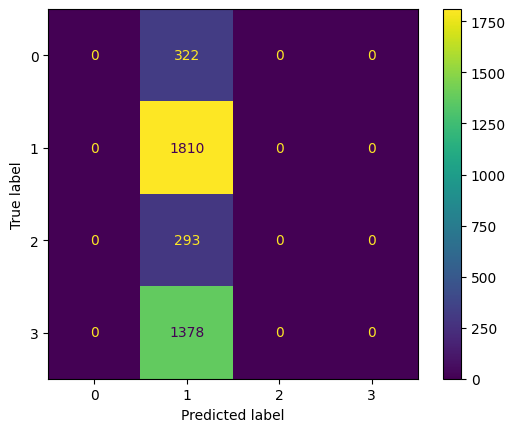

In [ ]:
#Confusion Matrix for SVM model
cm = metrics.confusion_matrix(y_test, svm_model.predict(X_test))
n_classes = cm.shape[0]
display_labels = [str(i) for i in range(n_classes)]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

cm_display.plot()
plt.show()

In [ ]:
# Create a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = logistic_model.predict(X_test)

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Accuracy: 0.48, Precision: 0.12, Recall: 0.25, F1 Score: 0.16


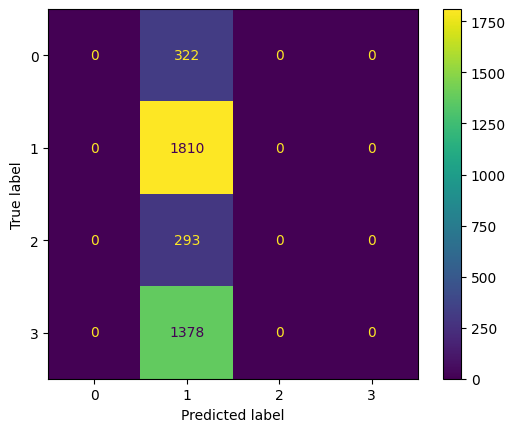

In [ ]:
#Confusion Matrix for Logistic Regression model
cm = metrics.confusion_matrix(y_test, logistic_model.predict(X_test))
n_classes = cm.shape[0]
display_labels = [str(i) for i in range(n_classes)]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

cm_display.plot()
plt.show()

In [ ]:
decisiontree_model = DecisionTreeClassifier()
decisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Accuracy: 0.48, Precision: 0.12, Recall: 0.25, F1 Score: 0.16


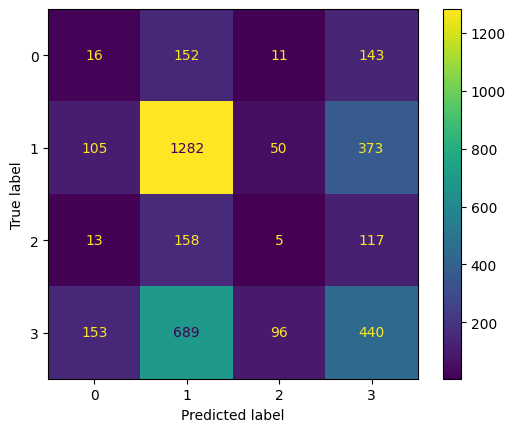

In [ ]:
#Confusion Matrix for Decision Tree Classifier model
cm = metrics.confusion_matrix(y_test, decisiontree_model.predict(X_test))
n_classes = cm.shape[0]
display_labels = [str(i) for i in range(n_classes)]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

cm_display.plot()
plt.show()